In [150]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [151]:
df = df.drop(['Unnamed: 32'], axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [153]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [154]:
print(df['diagnosis'].unique())

['M' 'B']


In [155]:
diagosis_map = {'M': 1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diagosis_map)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [156]:
df = df.drop(['id'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [157]:
numberOfMalignant = df[df['diagnosis'] == 1].shape[0]
print(numberOfMalignant)
numberOfBenign = df[df['diagnosis'] == 0].shape[0]
print(numberOfBenign)

212
357


In [158]:
#upsampling the minority to match the majority dataset count
# Separate the data into 'M' and 'B' classes
df_minority = df[df['diagnosis'] == 1]
df_majority = df[df['diagnosis'] == 0]

# Upsample the minority class to match the number of samples in the majority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the upsampled minority class with the majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the DataFrame to mix the rows
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_upsampled has an equal number of 'M' and 'B' samples
len(df_upsampled)


714

In [159]:
numberOfMalignant = df_upsampled[df_upsampled['diagnosis'] == 1].shape[0]
print(numberOfMalignant)
numberOfBenign = df_upsampled[df_upsampled['diagnosis'] == 0].shape[0]
print(numberOfBenign)

357
357


In [160]:
#A MinMax scaler is employed to bring the features of the dataset to a uniform range between 0 and 1.
X = df_upsampled.drop(['diagnosis'], axis=1)
y = df_upsampled['diagnosis']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the features and transform them
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable 'diagnosis'
df_scaled['diagnosis'] = y

# Now df_scaled contains the features scaled between 0 and 1
df_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.320365,0.475482,0.309239,0.189396,0.250970,0.166735,0.110052,0.116501,0.423648,0.091196,...,0.407513,0.237014,0.127998,0.148650,0.128386,0.108546,0.209828,0.216440,0.069261,0
1,0.317052,0.223876,0.303849,0.183245,0.362372,0.182077,0.041050,0.093439,0.339275,0.244103,...,0.232783,0.254943,0.144564,0.364723,0.141784,0.096326,0.299107,0.244628,0.193116,0
2,0.220503,0.291512,0.216847,0.114104,0.555836,0.281899,0.165651,0.173211,0.440285,0.320977,...,0.490609,0.174810,0.082703,0.644720,0.262143,0.229473,0.418557,0.244628,0.304595,0
3,0.414075,0.053094,0.407781,0.256076,0.466462,0.378467,0.279053,0.308698,0.430184,0.266007,...,0.062038,0.309229,0.164447,0.547646,0.297174,0.319808,0.498969,0.195545,0.226941,0
4,0.341190,0.476835,0.339161,0.198176,0.379164,0.380864,0.261246,0.321173,0.698158,0.302654,...,0.649687,0.321679,0.153878,0.559532,0.415776,0.299042,0.608935,0.622708,0.403188,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.291968,0.190396,0.286919,0.167720,0.372032,0.224642,0.217737,0.173111,0.452763,0.255055,...,0.241320,0.235370,0.120945,0.506042,0.217777,0.240335,0.334089,0.450227,0.265259,0
710,0.151403,0.264457,0.147398,0.071941,0.482712,0.224779,0.041425,0.095179,0.505051,0.402696,...,0.307911,0.107226,0.046795,0.458496,0.128167,0.052492,0.191581,0.293712,0.279162,0
711,0.220029,0.662158,0.214774,0.115207,0.369595,0.227245,0.167760,0.100249,0.439097,0.246420,...,0.762379,0.177449,0.084202,0.458496,0.193068,0.233466,0.234880,0.260004,0.145473,0
712,0.643144,0.272574,0.615783,0.501591,0.289880,0.202931,0.203608,0.348757,0.446821,0.141323,...,0.324132,0.539818,0.435214,0.347553,0.174949,0.192971,0.639175,0.233590,0.288064,1


### 1- Random Forest classifier

A- Initial features

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
columns_to_keep = [
    'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
    'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
    'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'
]
df_init = df_scaled[columns_to_keep]

#split the data to train and test datasets
X = df_init.drop('diagnosis', axis=1)
y = df_init['diagnosis']

# Split the data into 80% training and 20% testing
X_init_train, X_init_test, y_init_train, y_init_test = train_test_split(X, y, test_size=0.2, random_state=44)


In [163]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 10, max_features = 'log2', min_samples_split = 2)
rf.fit(X_init_train, y_init_train)
y_init_pred = rf.predict(X_init_test)

In [164]:
rf_accuracy = accuracy_score(y_init_test, y_init_pred)
rf_precision = precision_score(y_init_test, y_init_pred)
rf_recall = recall_score(y_init_test, y_init_pred)
rf_f1 = f1_score(y_init_test, y_init_pred)
rf_roc_auc= roc_auc_score(y_init_test, y_init_pred)

In [165]:
results = pd.DataFrame([['Random Forest Classifier', (rf_accuracy*100), rf_precision, rf_recall, rf_f1, rf_roc_auc]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Random Forest Classifier,100.0,1.0,1.0,1.0,1.0


In [166]:
rf_cm = confusion_matrix(y_init_test, y_init_test)
false_negative_rf=rf_cm[1: ,:-1]
false_positive_rf=rf_cm[ :1 , 1:]
print(rf_cm)

[[73  0]
 [ 0 70]]


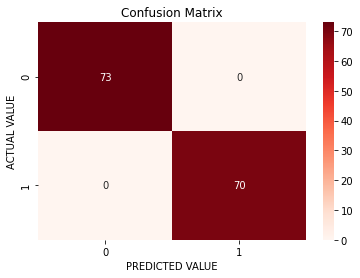

In [167]:
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

B- Minimal features

In [168]:
# minimal dataset
selected_features = [
    'texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
    'area_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'diagnosis'
]

df_selected_features = df_scaled[selected_features]
X_minimal = df_selected_features.drop('diagnosis', axis=1)
y = df_selected_features['diagnosis']
# # Split the data into 80% training and 20% testing
X_minimal_train, X_minimal_test, y_minimal_train, y_minimal_test = train_test_split(X_minimal, y, test_size=0.2, random_state=40)

In [169]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 10, max_features = 'log2', min_samples_split = 2)
rf.fit(X_minimal_train, y_minimal_train)
y_minimal_pred = rf.predict(X_minimal_test)

In [170]:
rf_accuracy_minimal = accuracy_score(y_minimal_test, y_minimal_pred)
rf_precision_minimal = precision_score(y_minimal_test, y_minimal_pred)
rf_recall_minimal = recall_score(y_minimal_test, y_minimal_pred)
rf_f1_minimal = f1_score(y_minimal_test, y_minimal_pred)
rf_roc_auc_minimal= roc_auc_score(y_minimal_test, y_minimal_pred)

In [171]:
results = pd.DataFrame([['Random Forest Classifier', (rf_accuracy_minimal*100), rf_precision_minimal, rf_recall_minimal, rf_f1_minimal, rf_roc_auc_minimal]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Random Forest Classifier,99.300699,0.984615,1.0,0.992248,0.993671


In [174]:
rf_cm_minimal = confusion_matrix(y_minimal_test, y_minimal_test)
false_negative_rf=rf_cm_minimal[1: ,:-1]
false_positive_rf=rf_cm_minimal[ :1 , 1:]
print(rf_cm_minimal)

[[79  0]
 [ 0 64]]


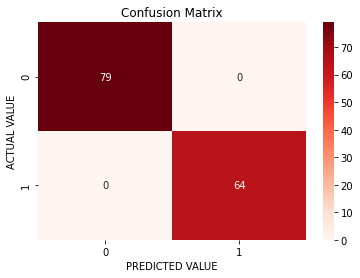

In [173]:
sns.heatmap(rf_cm_minimal, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()